# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.2: SARSA Agent

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

In [2]:
from collections import defaultdict
import random

In [3]:
p=defaultdict(lambda: np.zeros(10))
p.items()

dict_items([])

In [3]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [4]:
p = defaultdict(lambda: dict())
print (p)

defaultdict(<function <lambda> at 0x7f36da9e49d8>, {})


In [5]:
class SarsaAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(SarsaAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize empty dictionary here
        ## In addition, initialize the value of epsilon, alpha and gamma
        #self.Q = defaultdict(lambda: np.zeros(env.action_space.n))
        self.Q={}
        self.epsilon=epsilon
        self.gamma=gamma
        self.alpha=alpha
        
    def getQ(self, state, action):
        return self.Q.get((state, action), 0.0)      
        
    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    #def epsilon_policy(self,Q,epsilon,num_actions):
        
    def chooseAction(self, state):
        if random.random() < self.epsilon:
            action = random.choice(self.actions)
        else:
            #print ([a for a in self.actions])
            #print(state)
            q = [self.getQ(state, a) for a in self.actions]
            maxQ = max(q)
            count = q.count(maxQ)
            if count > 1:
                best = [i for i in range(len(self.actions)) if q[i] == maxQ]
                #print("best"+str(best))
                i = random.choice(best)
                
            else:
                i = q.index(maxQ)

            action = self.actions[i]
        return action
    
    def act(self, state):
        stateStr = self.stateToString(state)      
        #action = np.random.randint(0, self.num_actions)
        #policy = self.epsilon_policy(self.Q,self.epsilon,self.num_actions)
        #action_probs = policy(stateStr)
        action = self.chooseAction(stateStr)
    
        #print("actions"+str(action))
        return action

    def learn(self, state1, action1, reward, state2, action2):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        #print (self.Q)
        #print (action1)
        #print (action2)
        ## TODO 3
        ## Implement the sarsa update here
        
        oldv = self.Q.get((state1Str, action1), None)
        #print (oldv)
        newv= self.getQ(state2Str, action2)
        if oldv is None:
            self.Q[(state1Str, action1)] = reward 
        else:
            self.Q[(state1Str, action1)] = oldv + self.alpha * ((self.gamma * newv) - oldv)
        
        #td_target = reward + self.gamma * self.Q[(state1, action1)]
        #td_delta = td_target - Q[(state2, action2)]
        #Q[(state1, action1)] += self.alpha * td_delta
        
        """
        SARSA Update
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * Q(s',a') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """
        #return Q

4
{}


<IPython.core.display.Javascript object>


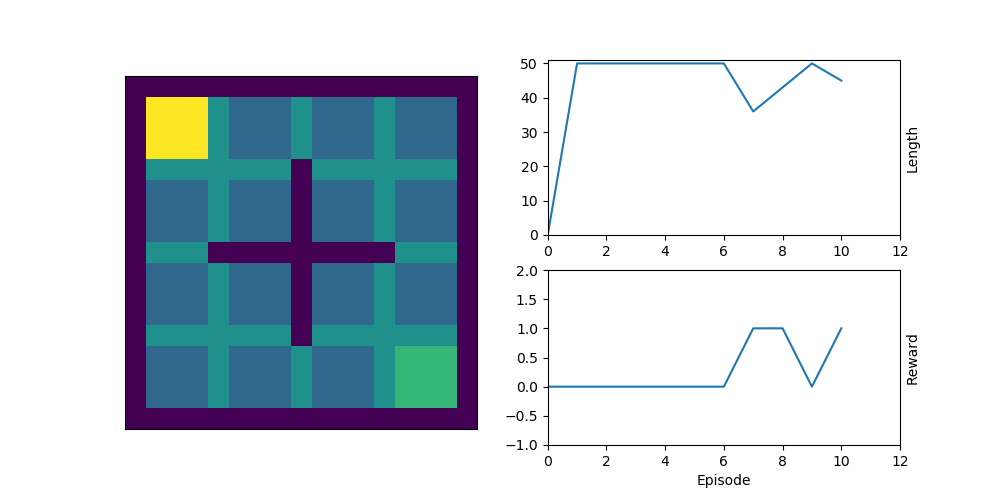

In [7]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
print (env.action_space.n)
agent = SarsaAgent(range(env.action_space.n))
print (agent.Q)
experiment = Experiment(env, agent)
experiment.run_sarsa(10, interactive)

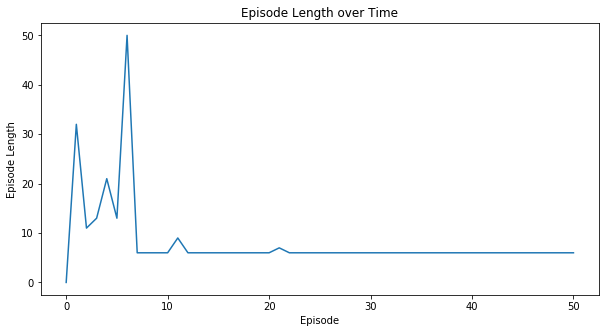

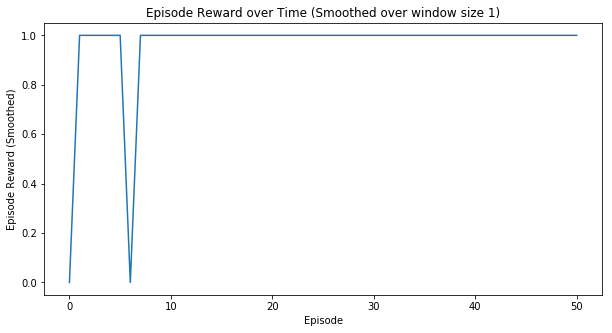

In [11]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(50, interactive)

In [ ]:
interactive = True
%matplotlib nbagg
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(10, interactive)

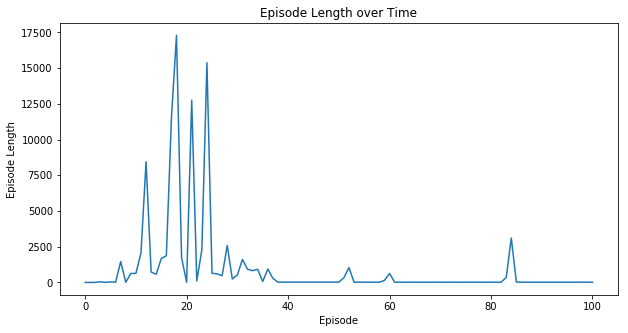

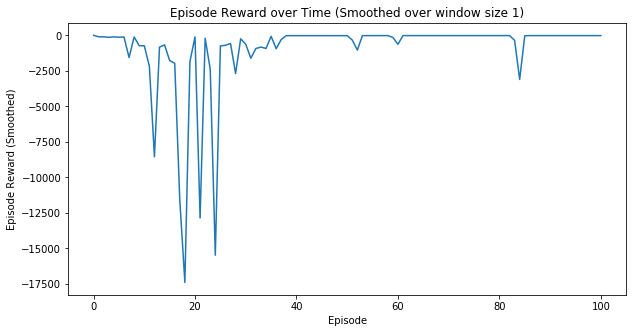

In [10]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(100, interactive)

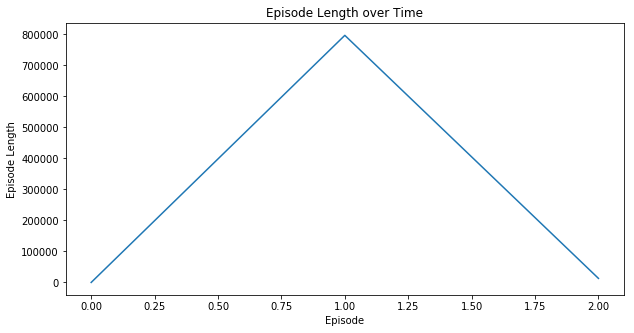

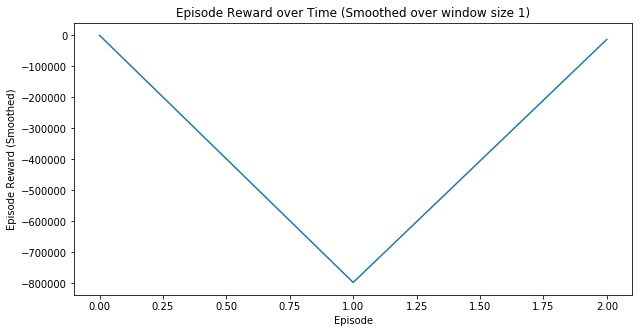

In [11]:
interactive = False
%matplotlib inline
env = WindyGridworldEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(2, interactive)